In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from sklearn.metrics import plot_roc_curve
import tensorflow as tf
from sklearn.metrics import confusion_matrix, average_precision_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
#Import the packages that will likely be required based on the guides followed
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error

In [3]:
from google.colab import files#Only needed if you are working on Colab, choose the file you are using, otherwise, ignore this block of code if you are working in a directory where the file is already present
uploaded = files.upload()

In [4]:
features = pd.read_csv('unbalancedFinal.csv')#Read the file
features.head(5)#Print the first five lines

,Unnamed: 0,id,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,...,L3p,P1p,P2p,E1p,E2p,E3p,Tp,Ap,Vp,Kp,Dp,L1i,L2i,L3i,P1i,P2i,E1i,E2i,E3i,Ti,Ai,Vi,Ki,Di,L1s,L2s,L3s,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds,canonical_smiles,standard_value,Activity
0,0,CHEMBL535,0,-1.1503,1.323190,46.1776,58.921653,15,22,50,29,21,0,21,6,1,0,0,1.0,0.0,0.0,0.0,1.0,4844.967504,5466.499709,8302.238665,9157.506874,9075.518287,7394.307769,6987.129099,5888.784138,4763.077446,11399.933392,14671.382689,22403.737985,25950.182236,24921.423381,21914.112380,19299.658629,17370.133353,...,1.308808,0.871937,0.078386,0.553255,0.317499,0.236940,26.346059,80.209795,168.646807,0.807905,1.107694,24.824944,2.472197,1.736283,0.855047,0.085150,0.647434,0.446381,0.436547,29.033424,108.767704,244.360528,0.782571,1.530361,24.456885,2.502067,1.645761,0.854995,0.087470,0.628402,0.456782,0.388994,28.604714,105.560777,234.874195,0.782492,1.474178,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...,52.0,active
1,1,CHEMBL388978,0,-1.3061,1.705897,56.9655,73.422618,20,24,61,35,26,0,28,4,3,0,0,0.0,0.0,0.0,0.0,0.0,5618.501251,6857.140206,11298.756440,14343.181765,16644.983962,16990.545581,15488.759131,11904.613891,7230.896611,14289.079628,19086.318812,31216.447728,40138.766358,47723.990768,51142.031406,49556.445939,41379.232445,...,1.354920,0.498479,0.417146,0.342000,0.351691,0.133509,16.058392,73.543593,162.254911,0.373438,0.827200,8.274518,7.851938,1.802601,0.461514,0.437945,0.398306,0.511036,0.238681,17.929057,94.040573,229.086450,0.349189,1.148023,8.306986,7.633004,1.695522,0.471037,0.432820,0.415086,0.489964,0.209741,17.635512,90.433865,215.577791,0.355786,1.114791,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,9.0,active
2,2,CHEMBL24828,0,0.0961,0.009235,70.4342,71.652204,17,17,61,33,28,0,23,8,1,1,0,0.0,0.0,0.0,0.0,0.0,5316.325089,6166.221937,8513.706417,8415.930003,7806.902551,8131.069495,8234.890131,7861.695668,7554.339035,13197.654649,16858.344841,23660.374082,25568.523625,24366.941760,23999.687071,24545.949412,24132.842046,...,0.660403,0.724262,0.252503,0.500645,0.361580,0.249099,28.422556,166.070802,292.059032,0.586393,1.111323,22.280597,7.925906,0.863491,0.717110,0.255098,0.577831,0.425702,0.420493,31.069994,202.676963,386.234208,0.575665,1.424027,22.348808,7.730701,0.821208,0.723246,0.250179,0.583767,0.409861,0.380489,30.900717,197.473475,370.255863,0.584868,1.374117,COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1,10000.0,inactive
3,3,CHEMBL514409,0,-1.7822,3.176237,27.8502,47.421516,17,17,39,27,12,0,15,6,3,1,0,2.0,0.0,0.0,0.0,2.0,5870.957128,6081.415725,8279.584112,8521.572709,8403.195116,6548.110302,6438.789325,5183.128361,4945.518074,9785.681078,12007.994919,17220.304787,18373.109279,16672.316136,14277.636495,13207.824086,11799.229389,...,1.156855,0.893659,0.061827,0.601703,0.210744,0.247934,25.988219,66.042658,135.200503,0.840488,1.060381,23.306688,2.105445,1.591611,0.863091,0.077969,0.605923,0.356430,0.464366,27.003744,89.517180,194.622789,0.794636,1.426719,23.713050,2.008544,1.517893,0.870540,0.073736,0.628374,0.319273,0.408882,27.239486,86.671322,186.206069,0.805809,1.356529,CCS(=O)(=O)Nc1ccc2c(c1)/C(=C(/Nc1ccc(CN3CCCCC3...,19.0,active
4,4,CHEMBL223360,0,1.3168,1.733962,29.6830,63.652688,26,28,53,37,16,0,24,6,1,0,0,6.0,0.0,0.0,0.0,6.0,7077.376168,7023.581668,11847.157072,10932.904375,10272.532050,8527.892481,8936.087687,8331.541258,8874.988779,13400.285403,16672.137908,24523.779156,25731.824870,24789.119503,22579.271078,22590.905011,21645.057743,...,0.614466,0.836431,0.143263,0.488558,0.275673,0.166216,30.260138,127.941264,225.623646,0.754646,0.930447,28.139483,5.339624,0.846395,0.819784,0.155559,0.595168,0.425572,0.322218,34.325501,178.590784,340.090669,0.729675,1.342958,28.483683,5.294125,0.805089,0.823635,0.153085,0.609217,0.417605,0.290674,34.582898,177.990325,333.977553,0.735452,1.317496,Cc1ccc(F)c(NC(=O)Nc2

In [5]:
print('The shape of our features is:', features.shape)#Dimension of the dataset

The shape of our features is: (242, 1880)


In [6]:
features.describe()#Equivalent to summary function on R

,Unnamed: 0,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,...,L1p,L2p,L3p,P1p,P2p,E1p,E2p,E3p,Tp,Ap,Vp,Kp,Dp,L1i,L2i,L3i,P1i,P2i,E1i,E2i,E3i,Ti,Ai,Vi,Ki,Di,L1s,L2s,L3s,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds,standard_value
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.0,242.000000,242.000000,242.000000,242.000000,242.0,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,...,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,100.764463,0.123967,-0.414543,1.311968,45.880328,61.669286,17.590909,19.793388,51.491736,30.433884,21.057851,0.0,21.623967,4.780992,2.425620,0.280992,0.0,0.900826,0.359504,0.028926,0.033058,1.322314,6343.924744,5904.955665,8720.489881,9404.070627,9207.112353,8490.812996,8098.951238,7752.677050,6958.481374,12037.282217,15067.543325,22131.935715,24808.125862,24220.438302,23065.335418,22085.319819,20752.961784,18617.189932,...,20.150657,3.973075,1.070062,0.775178,0.178484,0.493021,0.336758,0.235351,25.193794,102.815048,216.221862,0.669208,1.065129,21.397704,4.495258,1.334150,0.761186,0.185654,0.555171,0.443372,0.382860,27.227112,127.218832,285.358739,0.648878,1.381403,21.186369,4.397989,1.289187,0.763488,0.184434,0.543688,0.423973,0.355944,26.873545,122.706249,272.270533,0.652048,1.323605,19237.955706
std,65.555386,0.330227,1.069978,1.808144,18.023258,12.127195,4.750409,5.223498,11.178759,5.596918,6.437439,0.0,4.295506,1.903690,1.415916,0.502659,0.0,1.271487,0.589406,0.167945,0.179158,1.430056,3147.230281,1162.688818,1752.477235,2117.800509,2351.107434,2423.758785,2626.289502,2709.397222,2776.539195,2212.072607,2875.132944,4352.023194,5473.946325,6147.991209,6772.798481,7249.128668,7342.491185,7073.582255,...,9.807322,1.885512,0.597984,0.111794,0.098151,0.078735,0.058480,0.069644,9.692940,59.336102,147.465743,0.155391,0.119423,10.248711,1.949822,0.671859,0.111285,0.096384,0.063214,0.060663,0.082120,10.110943,69.314489,189.073793,0.153577,0.115660,10.162409,1.920000,0.658780,0.111430,0.096588,0.063365,0.056820,0.078144,10.022869,67.501710,181.198227,0.154387,0.111572,12644.340814
min,0.000000,0.000000,-3.174600,0.000108,6.737100,32.976344,5.000000,5.000000,25.000000,17.000000,8.000000,0.0,13.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2676.186305,3131.930800,4728.038207,4736.197258,3788.315544,2938.771772,1321.322547,454.028738,54.524736,6880.925703,8854.457355,13656.908550,14888.962837,12362.783042,9157.839556,5298.088303,2497.341841,645.448932,...,5.494471,1.318774,0.037962,0.467195,0.033091,0.324161,0.210744,0.059864,8.900909,15.774948,25.376321,0.277504,0.791750,6.242292,1.639731,0.037875,0.461514,0.037428,0.380349,0.270819,0.113823,10.017013,25.840085,37.928931,0.278239,1.044635,6.013145,1.566630,0.037482,0.469140,0.037388,0.353833,0.269598,0.147013,9.806337,23.589750,35.071954,0.278235,1.005617,0.550000
25%,40.000000,0.000000,-1.150300,0.132569,30.826400,51.814041,15.000000,17.000000,42.000000,26.000000,16.000000,0.0,18.250000,3.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4693.664153,5011.574605,7347.316099,7748.791871,7376.838276,6678.888334,6222.969469,5880.380472,4882.233844,10423.890603,12936.040676,18927.991

In [7]:
#checking for missing data
total_na_count = features.isna().sum()
print("TOTAL MISSING VALUE: ")
print(total_na_count)


TOTAL MISSING VALUE: 
Unnamed: 0          0
id                  0
nAcid               0
ALogP               0
ALogp2              0
                   ..
Ks                  0
Ds                  0
canonical_smiles    0
standard_value      0
Activity            0
Length: 1880, dtype: int64


In [8]:
features_raw = pd.DataFrame.from_dict(features)
#the set of molecular descriptors contains empty strings, replacing them by NaN
features = features_raw.replace(r'^\s*$', np.nan, regex=True)

In [9]:
features = features.dropna()#removing NaN values
features

,Unnamed: 0,id,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,...,L3p,P1p,P2p,E1p,E2p,E3p,Tp,Ap,Vp,Kp,Dp,L1i,L2i,L3i,P1i,P2i,E1i,E2i,E3i,Ti,Ai,Vi,Ki,Di,L1s,L2s,L3s,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds,canonical_smiles,standard_value,Activity
0,0,CHEMBL535,0,-1.1503,1.323190,46.1776,58.921653,15,22,50,29,21,0,21,6,1,0,0,1.0,0.0,0.0,0.0,1.0,4844.967504,5466.499709,8302.238665,9157.506874,9075.518287,7394.307769,6987.129099,5888.784138,4763.077446,11399.933392,14671.382689,22403.737985,25950.182236,24921.423381,21914.112380,19299.658629,17370.133353,...,1.308808,0.871937,0.078386,0.553255,0.317499,0.236940,26.346059,80.209795,168.646807,0.807905,1.107694,24.824944,2.472197,1.736283,0.855047,0.085150,0.647434,0.446381,0.436547,29.033424,108.767704,244.360528,0.782571,1.530361,24.456885,2.502067,1.645761,0.854995,0.087470,0.628402,0.456782,0.388994,28.604714,105.560777,234.874195,0.782492,1.474178,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...,52.0,active
1,1,CHEMBL388978,0,-1.3061,1.705897,56.9655,73.422618,20,24,61,35,26,0,28,4,3,0,0,0.0,0.0,0.0,0.0,0.0,5618.501251,6857.140206,11298.756440,14343.181765,16644.983962,16990.545581,15488.759131,11904.613891,7230.896611,14289.079628,19086.318812,31216.447728,40138.766358,47723.990768,51142.031406,49556.445939,41379.232445,...,1.354920,0.498479,0.417146,0.342000,0.351691,0.133509,16.058392,73.543593,162.254911,0.373438,0.827200,8.274518,7.851938,1.802601,0.461514,0.437945,0.398306,0.511036,0.238681,17.929057,94.040573,229.086450,0.349189,1.148023,8.306986,7.633004,1.695522,0.471037,0.432820,0.415086,0.489964,0.209741,17.635512,90.433865,215.577791,0.355786,1.114791,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,9.0,active
2,2,CHEMBL24828,0,0.0961,0.009235,70.4342,71.652204,17,17,61,33,28,0,23,8,1,1,0,0.0,0.0,0.0,0.0,0.0,5316.325089,6166.221937,8513.706417,8415.930003,7806.902551,8131.069495,8234.890131,7861.695668,7554.339035,13197.654649,16858.344841,23660.374082,25568.523625,24366.941760,23999.687071,24545.949412,24132.842046,...,0.660403,0.724262,0.252503,0.500645,0.361580,0.249099,28.422556,166.070802,292.059032,0.586393,1.111323,22.280597,7.925906,0.863491,0.717110,0.255098,0.577831,0.425702,0.420493,31.069994,202.676963,386.234208,0.575665,1.424027,22.348808,7.730701,0.821208,0.723246,0.250179,0.583767,0.409861,0.380489,30.900717,197.473475,370.255863,0.584868,1.374117,COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1,10000.0,inactive
3,3,CHEMBL514409,0,-1.7822,3.176237,27.8502,47.421516,17,17,39,27,12,0,15,6,3,1,0,2.0,0.0,0.0,0.0,2.0,5870.957128,6081.415725,8279.584112,8521.572709,8403.195116,6548.110302,6438.789325,5183.128361,4945.518074,9785.681078,12007.994919,17220.304787,18373.109279,16672.316136,14277.636495,13207.824086,11799.229389,...,1.156855,0.893659,0.061827,0.601703,0.210744,0.247934,25.988219,66.042658,135.200503,0.840488,1.060381,23.306688,2.105445,1.591611,0.863091,0.077969,0.605923,0.356430,0.464366,27.003744,89.517180,194.622789,0.794636,1.426719,23.713050,2.008544,1.517893,0.870540,0.073736,0.628374,0.319273,0.408882,27.239486,86.671322,186.206069,0.805809,1.356529,CCS(=O)(=O)Nc1ccc2c(c1)/C(=C(/Nc1ccc(CN3CCCCC3...,19.0,active
4,4,CHEMBL223360,0,1.3168,1.733962,29.6830,63.652688,26,28,53,37,16,0,24,6,1,0,0,6.0,0.0,0.0,0.0,6.0,7077.376168,7023.581668,11847.157072,10932.904375,10272.532050,8527.892481,8936.087687,8331.541258,8874.988779,13400.285403,16672.137908,24523.779156,25731.824870,24789.119503,22579.271078,22590.905011,21645.057743,...,0.614466,0.836431,0.143263,0.488558,0.275673,0.166216,30.260138,127.941264,225.623646,0.754646,0.930447,28.139483,5.339624,0.846395,0.819784,0.155559,0.595168,0.425572,0.322218,34.325501,178.590784,340.090669,0.729675,1.342958,28.483683,5.294125,0.805089,0.823635,0.153085,0.609217,0.417605,0.290674,34.582898,177.990325,333.977553,0.735452,1.317496,Cc1ccc(F)c(NC(=O)Nc2

# ALL PREDICTORS

In [10]:
X = features.drop(["canonical_smiles", "standard_value", "Activity", 'id'], axis = 1) #predictors
y = features['Activity'] #target
y.replace({'active':1, 'inactive':0,'Inactive':0}, inplace = True)
y = pd.DataFrame(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 0)

Bagging

In [12]:
rf_features = RandomForestRegressor(max_features = 1875, random_state = 23)#Python counts from zero(hence 1875), bagging is just a case where m=p
rf_features.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_features=1875, random_state=23)

In [13]:
pred1 = rf_features.predict(X_test)
mean_squared_error(y_test, pred1)
pd.DataFrame(pred1)
pred1 = tf.math.round(pred1)
pred1

<tf.Tensor: shape=(61,), dtype=float64, numpy=
array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])>

In [14]:
rf_features.score(X_train, y_train)

0.9004254132658703

In [15]:
print(classification_report(y_test, pred1, digits=3))
print(f"Average precision score: {average_precision_score(y_test, pred1):.3f}")
print("Cohen kappa score: ", cohen_kappa_score(y_test, pred1))
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred1))

              precision    recall  f1-score   support

           0      0.945     0.929     0.937        56
           1      0.333     0.400     0.364         5

    accuracy                          0.885        61
   macro avg      0.639     0.664     0.650        61
weighted avg      0.895     0.885     0.890        61

Average precision score: 0.183
Cohen kappa score:  0.30114566284779054
Confusion matrix: 
[[52  4]
 [ 3  2]]


RANDOM FORESTS

In [16]:
rf_features_rf = RandomForestRegressor(max_features = 99, random_state = 23)
rf_features_rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_features=99, random_state=23)

In [17]:
pred2 = rf_features_rf.predict(X_test)
mean_squared_error(y_test, pred2)
pd.DataFrame(pred2)
pred2 = tf.math.round(pred2)
pred2

<tf.Tensor: shape=(61,), dtype=float64, numpy=
array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])>

In [18]:
rf_features_rf.score(X_train, y_train)

0.866827029703974

In [19]:
print(classification_report(y_test, pred2, digits=3))
print(f"Average precision score: {average_precision_score(y_test, pred2):.3f}")
print("Cohen kappa score: ", cohen_kappa_score(y_test, pred2))
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred2))

              precision    recall  f1-score   support

           0      0.931     0.964     0.947        56
           1      0.333     0.200     0.250         5

    accuracy                          0.902        61
   macro avg      0.632     0.582     0.599        61
weighted avg      0.882     0.902     0.890        61

Average precision score: 0.132
Cohen kappa score:  0.20087336244541498
Confusion matrix: 
[[54  2]
 [ 4  1]]


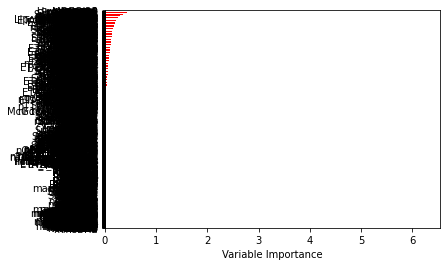

In [20]:
Importance = pd.DataFrame({'Importance':rf_features_rf.feature_importances_*100}, 
                          index = X.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh',
                                              color = 'r', )

plt.xlabel('Variable Importance')
from matplotlib.pyplot import figure



plt.gca().legend_ = None

RF AUC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


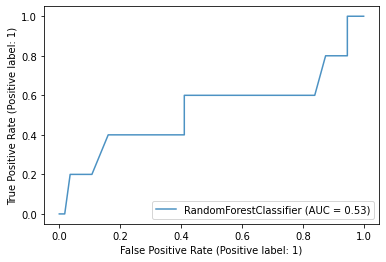

In [21]:
rfc = RandomForestClassifier(max_features=99 ,random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

Bagging AUC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


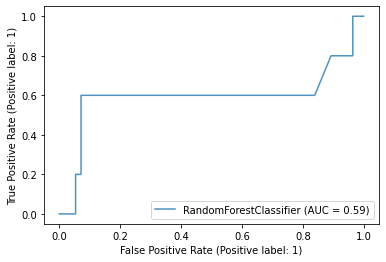

In [22]:
rfc = RandomForestClassifier(max_features=1875 ,random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

# LASSO BEST SUBSET

In [23]:
features_sub = features[['Activity','MATS4p', 'MATS4i', 'GATS1e', 'GATS2e']]

In [24]:
X1 = features_sub.iloc[:, 1:-1]#X-axis covers feature sub
y1 = pd.DataFrame(y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size = 0.75, random_state = 0)

Bagging

In [26]:
rf_features_1 = RandomForestRegressor(max_features = 3, random_state = 23)#Python counts from zero(hence 3), bagging is just a case where m=p
rf_features_1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_features=3, random_state=23)

In [27]:
pred3 = rf_features_1.predict(X_test)
mean_squared_error(y_test, pred3)
pd.DataFrame(pred3)
pred3 = tf.math.round(pred3)
pred3

<tf.Tensor: shape=(61,), dtype=float64, numpy=
array([0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])>

In [28]:
rf_features_1.score(X_train, y_train)

0.8162106342623312

In [29]:
print(classification_report(y_test, pred3, digits=3))
print(f"Average precision score: {average_precision_score(y_test, pred3):.3f}")
print("Cohen kappa score: ", cohen_kappa_score(y_test, pred3))
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred3))

              precision    recall  f1-score   support

           0      0.958     0.821     0.885        56
           1      0.231     0.600     0.333         5

    accuracy                          0.803        61
   macro avg      0.595     0.711     0.609        61
weighted avg      0.899     0.803     0.839        61

Average precision score: 0.171
Cohen kappa score:  0.24380165289256206
Confusion matrix: 
[[46 10]
 [ 2  3]]


Random Forest

In [30]:
rf_features_rf_1 = RandomForestRegressor(max_features =2, random_state = 23)
rf_features_rf_1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_features=2, random_state=23)

In [31]:
pred4 = rf_features_rf_1.predict(X_test)
mean_squared_error(y_test, pred4)
pd.DataFrame(pred4)
pred4 = tf.math.round(pred4)
pred4

<tf.Tensor: shape=(61,), dtype=float64, numpy=
array([0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])>

In [32]:
rf_features_rf_1.score(X_train, y_train)

0.8094772070614907

In [33]:
print(classification_report(y_test, pred4, digits=3))
print(f"Average precision score: {average_precision_score(y_test, pred4):.3f}")
print("Cohen kappa score: ", cohen_kappa_score(y_test, pred4))
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred4))

              precision    recall  f1-score   support

           0      0.935     0.768     0.843        56
           1      0.133     0.400     0.200         5

    accuracy                          0.738        61
   macro avg      0.534     0.584     0.522        61
weighted avg      0.869     0.738     0.790        61

Average precision score: 0.103
Cohen kappa score:  0.08785046728971957
Confusion matrix: 
[[43 13]
 [ 3  2]]


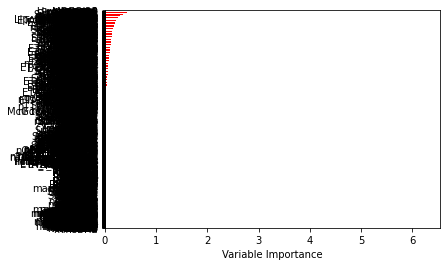

In [34]:
Importance = pd.DataFrame({'Importance':rf_features_rf.feature_importances_*100}, 
                          index = X.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh',
                                              color = 'r', )

plt.xlabel('Variable Importance')
from matplotlib.pyplot import figure



plt.gca().legend_ = None

Bagging AUC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


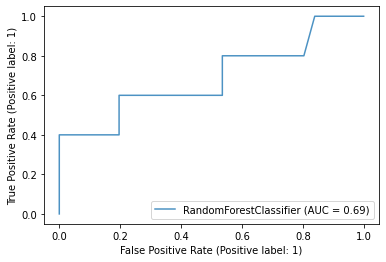

In [35]:
rfc = RandomForestClassifier(max_features=3, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

RF AUC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


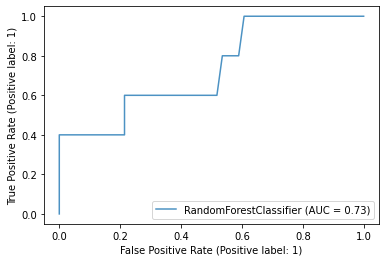

In [36]:
rfc = RandomForestClassifier(max_features=2 ,random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
plt.show()